Loading dataset from local file: heart.csv

Dataset shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None


--- Missing values per column ---


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

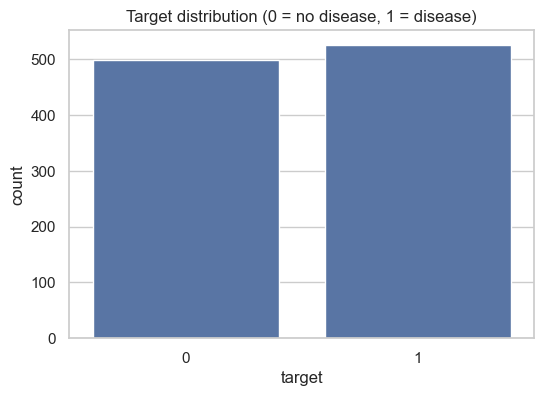

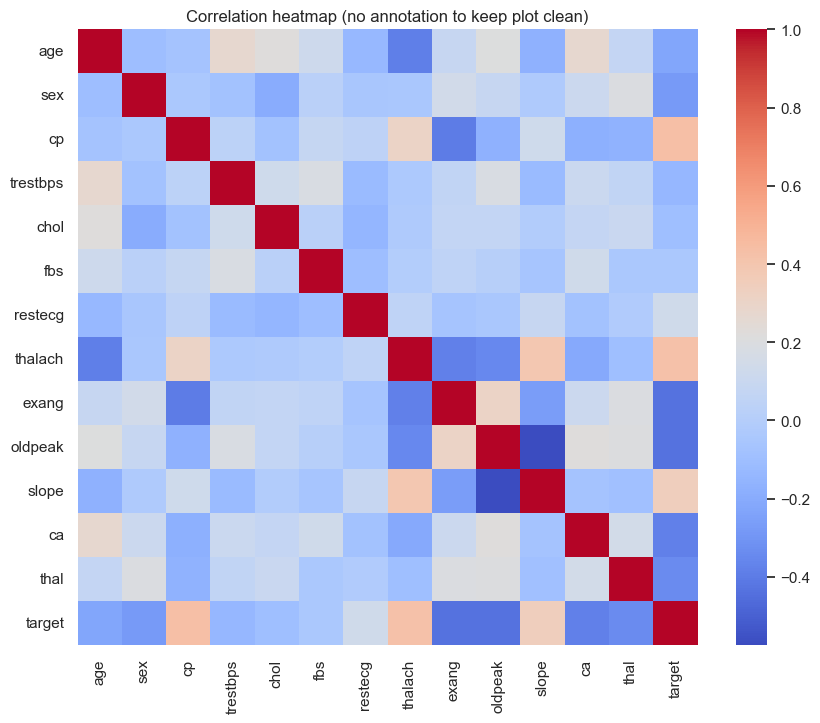

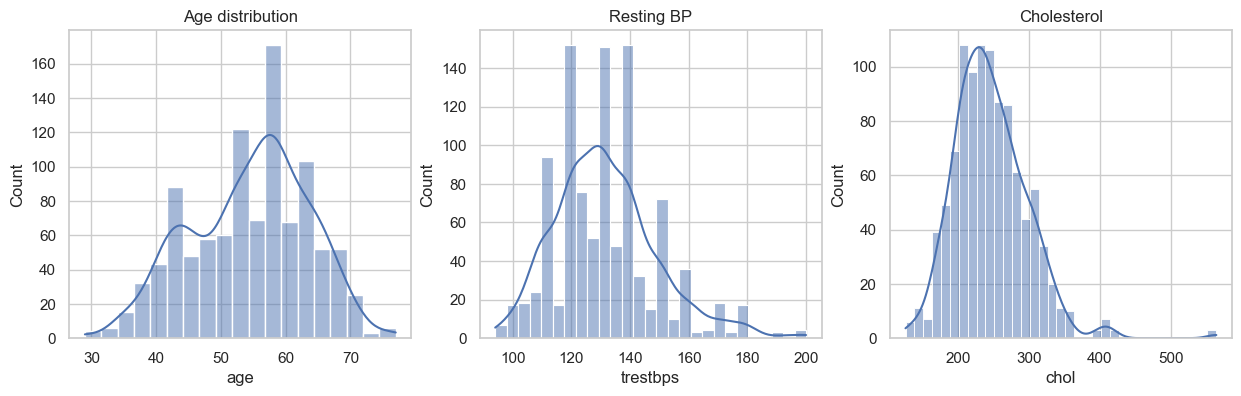

Numerical columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca']
Categorical columns (to one-hot): ['cp', 'restecg', 'slope', 'thal']

Missing values after encoding:


np.int64(0)


Train/Test sizes: (820, 19) (205, 19)

--- Baseline Logistic Regression Evaluation ---
Accuracy: 0.8585365853658536
Precision: 0.8220338983050848
Recall: 0.9238095238095239
F1 score: 0.8699551569506726

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       100
           1       0.82      0.92      0.87       105

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



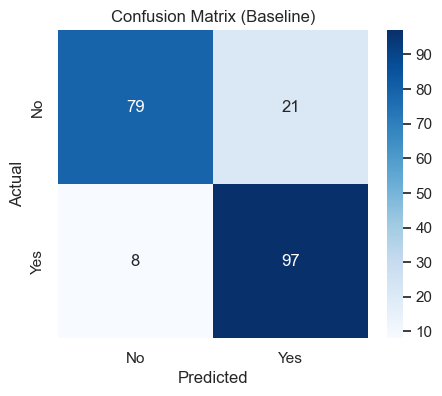

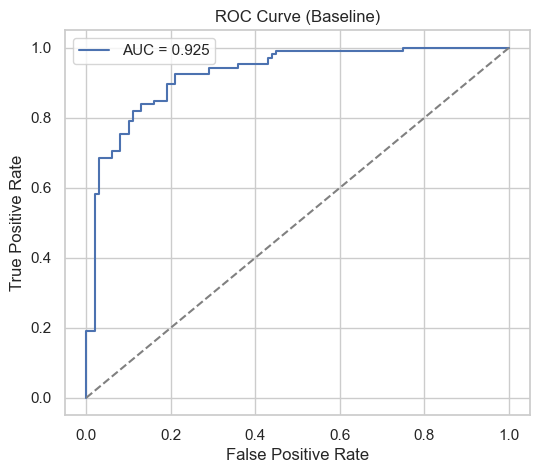

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best params from GridSearch:
{'C': np.float64(1.0), 'penalty': 'l2', 'solver': 'liblinear'}

--- Best Model Evaluation ---
Accuracy: 0.8585365853658536
Precision: 0.8220338983050848
Recall: 0.9238095238095239
F1 score: 0.8699551569506726

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       100
           1       0.82      0.92      0.87       105

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



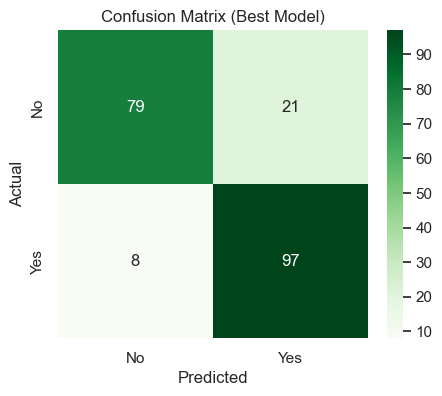

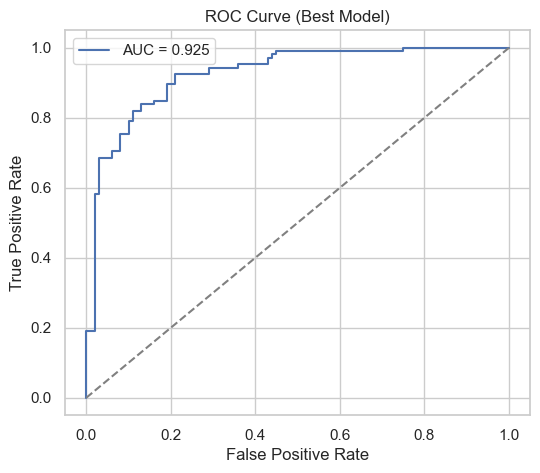


Top features by absolute coefficient (best model):


,feature,coefficient
10,cp_2,1.835578
11,cp_3,1.523580
8,ca,-0.798106
18,thal_3,-0.773941
9,cp_1,0.760380
1,sex,-0.639819
14,slope_1,-0.613011
7,oldpeak,-0.519419
17,thal_2,0.516508
6,exang,-0.456335


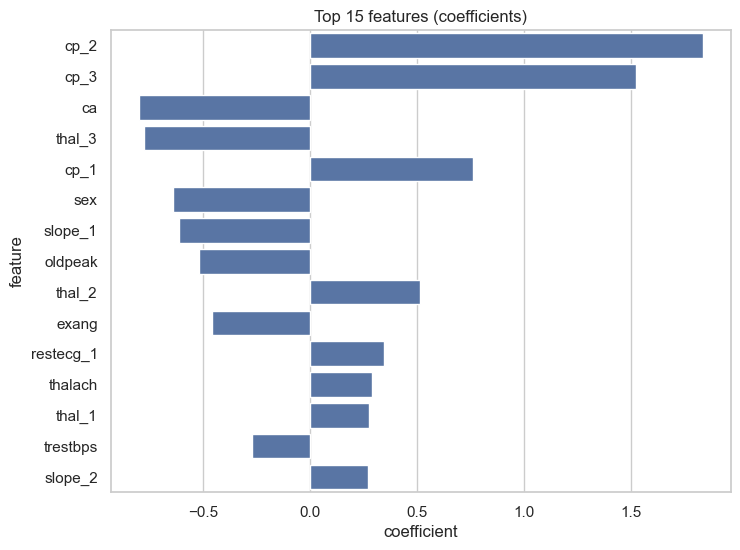


Selected top 10 features by RFE:
['exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'slope_1', 'thal_2', 'thal_3']

--- Evaluation on RFE-selected features ---
Accuracy: 0.8390243902439024
Precision: 0.8214285714285714
Recall: 0.8761904761904762
F1 score: 0.847926267281106

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- age
- chol
- fbs
- restecg_2
- sex
- ...


In [3]:
# Logistic Regression: Predicting Heart Disease
# Full notebook code (EDA, preprocessing, training, tuning, evaluation, RFE, prediction)
# Run each cell sequentially in Jupyter.

# 0. Imports
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from sklearn.feature_selection import RFE

sns.set(style="whitegrid")

# 1. Load dataset: try local, then several known mirrors; if all fail, create a small synthetic dataset
def load_heart_data():
    # Preferred local path
    local_paths = ["heart.csv", "heart.csv"]
    for p in local_paths:
        if os.path.exists(p):
            print(f"Loading dataset from local file: {p}")
            return pd.read_csv(p)

    # Try several public raw URLs (may or may not work depending on connectivity)
    urls = [
        "https://raw.githubusercontent.com/plotly/datasets/master/heart.csv",     # sometimes present
        "https://raw.githubusercontent.com/anishathalye/heart-disease/master/heart.csv",
        "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/heart/heart.csv",
        "https://raw.githubusercontent.com/datablist/sample-csv-files/main/files/people/heart.csv"
    ]
    for url in urls:
        try:
            print(f"Trying to load dataset from: {url}")
            df = pd.read_csv(url)
            print("Loaded from URL:", url)
            return df
        except Exception as e:
            print("Failed:", url, "->", str(e))

    # Fallback: create a small synthetic dataset with correct columns so pipeline runs
    print("No dataset found online or locally — creating a small synthetic example dataset (for testing).")
    rng = np.random.RandomState(42)
    n = 303  # similar to UCI size
    df = pd.DataFrame({
        "age": rng.randint(29, 77, size=n),
        "sex": rng.randint(0, 2, size=n),
        "cp": rng.randint(0, 4, size=n),
        "trestbps": rng.randint(94, 200, size=n),
        "chol": rng.randint(126, 564, size=n),
        "fbs": rng.randint(0,2, size=n),
        "restecg": rng.randint(0,3, size=n),
        "thalach": rng.randint(71, 202, size=n),
        "exang": rng.randint(0,2, size=n),
        "oldpeak": np.round(rng.uniform(0.0, 6.2, size=n), 1),
        "slope": rng.randint(0,3, size=n),
        "ca": rng.randint(0,4, size=n),
        "thal": rng.randint(0,4, size=n),
    })
    # create a synthetic target correlated to some features
    logits = (0.03*(df.age-50) + 0.8*df.cp - 0.01*df.trestbps + 0.02*(df.chol-200)
              -0.02*df.thalach + 0.6*df.exang + 0.5*(df.ca>0))
    probs = 1 / (1 + np.exp(-logits))
    df["target"] = (rng.rand(n) < probs).astype(int)
    return df

data = load_heart_data()
print("\nDataset shape:", data.shape)
display(data.head())

# 2. Quick exploration
print("\n--- Info ---")
display(data.info())

print("\n--- Missing values per column ---")
display(data.isnull().sum())

# If columns use different names (e.g., 'target' vs 'Target'), normalize them
# Many public CSVs use lowercase 'target'. Ensure expected columns exist.
expected_cols = {"age","sex","cp","trestbps","chol","fbs","restecg","thalach",
                 "exang","oldpeak","slope","ca","thal","target"}
if not expected_cols.issubset(set(data.columns)):
    print("Warning: dataset columns differ from expected set. Printing columns:")
    print(data.columns)

# 3. Visualizations (basic)
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=data)
plt.title("Target distribution (0 = no disease, 1 = disease)")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation heatmap (no annotation to keep plot clean)")
plt.show()

# Distribution examples
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.histplot(data["age"], ax=axes[0], kde=True).set_title("Age distribution")
sns.histplot(data["trestbps"], ax=axes[1], kde=True).set_title("Resting BP")
sns.histplot(data["chol"], ax=axes[2], kde=True).set_title("Cholesterol")
plt.show()

# 4. Preprocessing
# Separate X and y
X = data.drop(columns=["target"])
y = data["target"].astype(int)

# Some columns are categorical: cp, restecg, slope, thal, ca is numeric but small integer; treat cp, restecg, slope, thal as categorical
cat_cols = [c for c in ["cp","restecg","slope","thal"] if c in X.columns]
num_cols = [c for c in X.columns if c not in cat_cols]

print("Numerical columns:", num_cols)
print("Categorical columns (to one-hot):", cat_cols)

# One-hot encode categorical features (drop_first=True to avoid multicollinearity)
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Check for missing values after encoding
print("\nMissing values after encoding:")
display(X_encoded.isnull().sum().sum())

# 5. Train-test split (stratify on target)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain/Test sizes:", X_train.shape, X_test.shape)

# 6. Scaling numerical features (fit scaler on training)
scaler = StandardScaler()
# We need to scale only original numeric columns that are present in encoded df.
numeric_in_encoded = [c for c in num_cols if c in X_encoded.columns]
# Fit scaler on training numeric cols
X_train_num = scaler.fit_transform(X_train[numeric_in_encoded])
X_test_num = scaler.transform(X_test[numeric_in_encoded])

# Replace numeric columns with scaled values
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_in_encoded] = X_train_num
X_test_scaled[numeric_in_encoded] = X_test_num

# 7. Baseline Logistic Regression (default params)
base_model = LogisticRegression(solver="liblinear", random_state=42)
base_model.fit(X_train_scaled, y_train)
y_pred_base = base_model.predict(X_test_scaled)
y_prob_base = base_model.predict_proba(X_test_scaled)[:,1]

print("\n--- Baseline Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("Precision:", precision_score(y_test, y_pred_base))
print("Recall:", recall_score(y_test, y_pred_base))
print("F1 score:", f1_score(y_test, y_pred_base))
print("\nClassification report:\n", classification_report(y_test, y_pred_base))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Baseline)")
plt.show()

# ROC & AUC
fpr, tpr, thr = roc_curve(y_test, y_prob_base)
auc_score = roc_auc_score(y_test, y_prob_base)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Baseline)")
plt.legend()
plt.show()

# 8. Hyperparameter tuning using GridSearchCV
# We'll tune 'C' (inverse regularization strength) and penalty (l1 vs l2) where supported.
param_grid = [
    {"penalty": ["l2"], "C": np.logspace(-3,3,7), "solver": ["liblinear","lbfgs"]},
    {"penalty": ["l1"], "C": np.logspace(-3,3,7), "solver": ["liblinear","saga"]}
]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=5000),
                    param_grid=param_grid, scoring="f1", cv=cv, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("\nBest params from GridSearch:")
print(grid.best_params_)
best_model = grid.best_estimator_

# Evaluate best model
y_pred_best = best_model.predict(X_test_scaled)
y_prob_best = best_model.predict_proba(X_test_scaled)[:,1]

print("\n--- Best Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 score:", f1_score(y_test, y_pred_best))
print("\nClassification report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Model)")
plt.show()

fpr, tpr, thr = roc_curve(y_test, y_prob_best)
auc_score = roc_auc_score(y_test, y_prob_best)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Best Model)")
plt.legend()
plt.show()

# 9. Feature importance: coefficients (for linear model)
coef_df = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "coefficient": best_model.coef_[0]
}).sort_values(by="coefficient", key=abs, ascending=False)
print("\nTop features by absolute coefficient (best model):")
display(coef_df.head(15))

plt.figure(figsize=(8,6))
sns.barplot(x="coefficient", y="feature", data=coef_df.head(15))
plt.title("Top 15 features (coefficients)")
plt.show()

# 10. Recursive Feature Elimination (RFE) to pick top k features
# Use logistic regression with penalty consistent with best model
rfe_estimator = LogisticRegression(
    penalty=best_model.get_params().get("penalty", "l2"),
    C=best_model.get_params().get("C", 1.0),
    solver=best_model.get_params().get("solver", "liblinear"),
    random_state=42,
    max_iter=5000
)
n_features_to_select = min(10, X_train_scaled.shape[1])  # choose up to 10
rfe = RFE(estimator=rfe_estimator, n_features_to_select=n_features_to_select, step=1)
rfe.fit(X_train_scaled, y_train)

selected_features = list(X_train_scaled.columns[rfe.support_])
print(f"\nSelected top {len(selected_features)} features by RFE:")
print(selected_features)

# Retrain model on selected features and evaluate
X_train_sel = X_train_scaled[selected_features]
X_test_sel = X_test_scaled[selected_features]
best_model.fit(X_train_sel, y_train)
y_pred_sel = best_model.predict(X_test_sel)
y_prob_sel = best_model.predict_proba(X_test_sel)[:,1]

print("\n--- Evaluation on RFE-selected features ---")
print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1 score:", f1_score(y_test, y_pred_sel))
print("\nClassification report:\n", classification_report(y_test, y_pred_sel))

# 11. Predict for a hypothetical patient
# Define a sample patient using original input schema (unencoded) - adapt if some columns missing
sample = {
    "age": 63,
    "sex": 1,
    "cp": 3,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 0,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 0,
    "ca": 0,
    "thal": 1
}

# Build DataFrame in same format as X (before encoding)
sample_df = pd.DataFrame([sample])
# One-hot encode categorical columns in sample (must match training encoded columns)
sample_encoded = pd.get_dummies(sample_df, columns=[c for c in cat_cols], drop_first=True)
# Ensure missing dummy columns are added with 0
for col in X_train_scaled.columns:
    if col not in sample_encoded.columns:
        sample_encoded[col] = 0
# Reorder columns
sample_encoded = sample_encoded[X_train_scaled.columns]
# Scale numeric columns in sample
sample_encoded[numeric_in_encoded] = scaler.transform(sample_encoded[numeric_in_encoded])

# Predict using best_model (on all features)
pred_prob = best_model.predict_proba(sample_encoded)[:,1][0]
pred_label = best_model.predict(sample_encoded)[0]
print(f"\nHypothetical patient predicted probability of disease: {pred_prob:.3f}")
print("Predicted label (1 = disease, 0 = no disease):", pred_label)

# If using RFE-selected features, show prediction too
if len(selected_features)>0:
    pred_prob_sel = best_model.predict_proba(sample_encoded[selected_features])[:,1][0]
    pred_label_sel = best_model.predict(sample_encoded[selected_features])[0]
    print(f"(RFE model) Pred prob: {pred_prob_sel:.3f}, Pred label: {pred_label_sel}")

# 12. Save the best model and scaler (optional)
try:
    import joblib
    joblib.dump(best_model, "best_logistic_model.joblib")
    joblib.dump(scaler, "scaler.joblib")
    print("\nSaved best model to 'best_logistic_model.joblib' and scaler to 'scaler.joblib'.")
except Exception as e:
    print("Could not save model (joblib missing or permission issue):", e)

# End of notebook pipeline
print("\nDone. Notebook completed all steps.")
